# Inteligencia Artifical aplicada a Negocios y Empresas

# Maximizacion de beneficios de una empresa de venta online con Muestreo de Thompson


## Importar las librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Configuracion de los parametros

In [2]:
N = 10000
d = 9

# Creacion de la simulacion

In [3]:
# conversion_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
conversion_rates = [0.05, 0.13, 0.09, 0.16, 0.11, 0.04, 0.20, 0.08, 0.01]
X = np.array(np.zeros([N, d]))
for i in range(N):
    for j in range(d):
        if np.random.rand() <= conversion_rates[j]:
            X[i,j] = 1

# Implementacion de la Seleccion Aleatoria y el Muestreo de Thompson


In [4]:
# Implementacion de la Seleccion Aleatoria y el Muestreo de Thompson
strategies_selected_rs = []
strategies_selected_ts = []
total_reward_rs = 0
total_reward_ts = 0
number_of_rewards_1 = [0] * d
number_of_rewards_0 = [0] * d
for n in range(0, N):
    # Seleccion Aleatoria
    strategy_rs = random.randrange(d)
    strategies_selected_rs.append(strategy_rs)
    reward_rs = X[n, strategy_rs]
    total_reward_rs += reward_rs
    # Muestreo de Thompson
    strategy_ts = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(number_of_rewards_1[i]+1, 
                                         number_of_rewards_0[i]+1)
        if random_beta > max_random: 
            max_random = random_beta
            strategy_ts = i
    reward_ts = X[n, strategy_ts]
    if reward_ts == 1:
        number_of_rewards_1[strategy_ts] += 1
    else:
        number_of_rewards_0[strategy_ts] += 1
    strategies_selected_ts.append(strategy_ts)
    total_reward_ts += reward_ts

# Calcular le retorno relativo y absoluto

In [5]:
absolute_return = (total_reward_ts - total_reward_rs)*100
relative_return = (total_reward_ts - total_reward_rs) / total_reward_rs * 100
print("Rendimiento Absoluto: {:.0f} $".format(absolute_return))
print("Rendimiento Relativo: {:.0f} %".format(relative_return))

Rendimiento Absoluto: 100600 $
Rendimiento Relativo: 103 %


# Representacion del histograma de selecciones

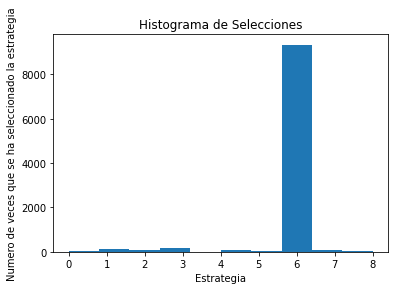

In [6]:
plt.hist(strategies_selected_ts)
plt.title("Histograma de Selecciones")
plt.xlabel("Estrategia")
plt.ylabel("Numero de veces que se ha seleccionado la estrategia")
plt.show()
